In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer  # Import imputer from sklearn

# Step 1: Load the dataset
data = pd.read_csv(r'E:\bigbasket\BigBasket Products.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [25]:
print(data['type'].head())


0            Hair Oil & Serum
1      Water & Fridge Bottles
2             Lamp & Lamp Oil
3    Laundry, Storage Baskets
4        Bathing Bars & Soaps
Name: type, dtype: object


In [26]:
# Step 2: Data Preprocessing (if needed)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_features = ['category', 'sub_category', 'brand', 'type']
encoded_data = pd.get_dummies(data, columns=cat_features)



In [21]:
print("Original Data:")
print(data.head())

print("\nEncoded Data:")
print(encoded_data.head())


Original Data:
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bot

In [27]:
# Drop the 'description' column from the DataFrame
data.drop(columns=['description'], inplace=True)

# Print the DataFrame to verify the changes
print(data.head())

   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  
0       220.0         220.0          Hair Oil & Serum     4.1  
1       180.0         180.0    Water & Fridge Bottles     2.3  
2 

In [28]:
sale_price_mean = data['sale_price'].mean()
market_price_mean = data['market_price'].mean()

print("Mean sale price:", sale_price_mean)
print("Mean market price:", market_price_mean)

if sale_price_mean > market_price_mean:
    print("Sale price is higher on average.")
elif sale_price_mean < market_price_mean:
    print("Market price is higher on average.")
else:
    print("Sale price and market price are equal on average.")


Mean sale price: 322.5148078388677
Mean market price: 382.05666448920346
Market price is higher on average.


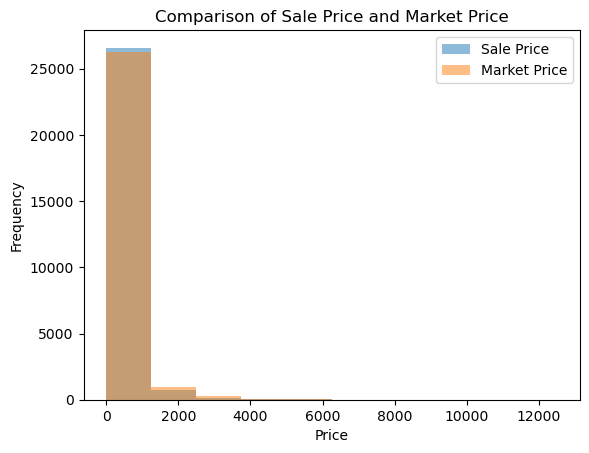

In [29]:
plt.hist(data['sale_price'], alpha=0.5, label='Sale Price')
plt.hist(data['market_price'], alpha=0.5, label='Market Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Comparison of Sale Price and Market Price')
plt.legend()
plt.show()

In [30]:
max_sale_price = data['sale_price'].max()
max_market_price = data['market_price'].max()

print("Maximum sale price:", max_sale_price)
print("Maximum market price:", max_market_price)

if max_sale_price > max_market_price:
    print("The highest sale price is higher.")
elif max_sale_price < max_market_price:
    print("The highest market price is higher.")
else:
    print("The highest sale price and market price are equal.")


Maximum sale price: 12500.0
Maximum market price: 12500.0
The highest sale price and market price are equal.


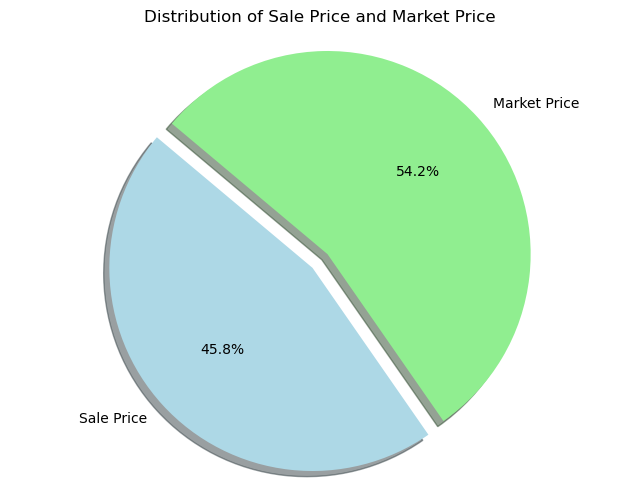

In [31]:
# Calculate the sum of sale prices and market prices
total_sale_price = data['sale_price'].sum()
total_market_price = data['market_price'].sum()

# Create a pie chart
labels = ['Sale Price', 'Market Price']
sizes = [total_sale_price, total_market_price]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the first slice (i.e., 'Sale Price')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Sale Price and Market Price')
plt.show()

In [36]:
# Calculate the loss percentage
data['loss_percentage'] = ((data['market_price'] - data['sale_price']) / data['market_price']) * 100


In [11]:
# Handle missing values in description column
data['description'].fillna('Unknown', inplace=True)

# Step 3: Feature Engineering (if needed)
# For example, you can create new features or transform existing ones here.



In [40]:
# Calculate profit for each item
data['profit'] = data['market_price'] - data['sale_price']

# Find the item with the maximum profit
max_profit_item = data.loc[data['profit'].idxmax()]
min_profit_item = data.loc[data['profit'].idxmin()]

print("Item with Maximum Profit:")
print(max_profit_item)
print("\nItem with Minimum Profit:")
print(min_profit_item)


Item with Maximum Profit:
index                                                          21931
product            Premium Cloth Dryer/Drying Stand - Foldable, S...
category                                      Kitchen, Garden & Pets
sub_category                                   Storage & Accessories
brand                                                             DP
sale_price                                                    4649.0
market_price                                                  8969.0
type                                        Cloth Dryer & Iron Table
rating                                                           NaN
loss_percentage                                            48.165905
profit                                                        4320.0
Name: 21930, dtype: object

Item with Minimum Profit:
index                                                   1
product            Garlic Oil - Vegetarian Capsule 500 mg
category                                 Beau

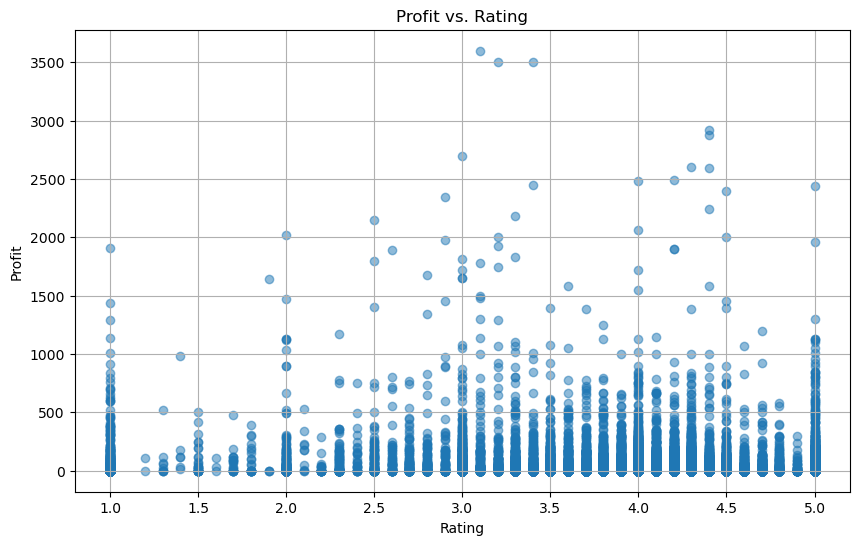

In [41]:
# Scatter plot of profit vs. rating
plt.figure(figsize=(10, 6))
plt.scatter(data['rating'], data['profit'], alpha=0.5)
plt.title('Profit vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

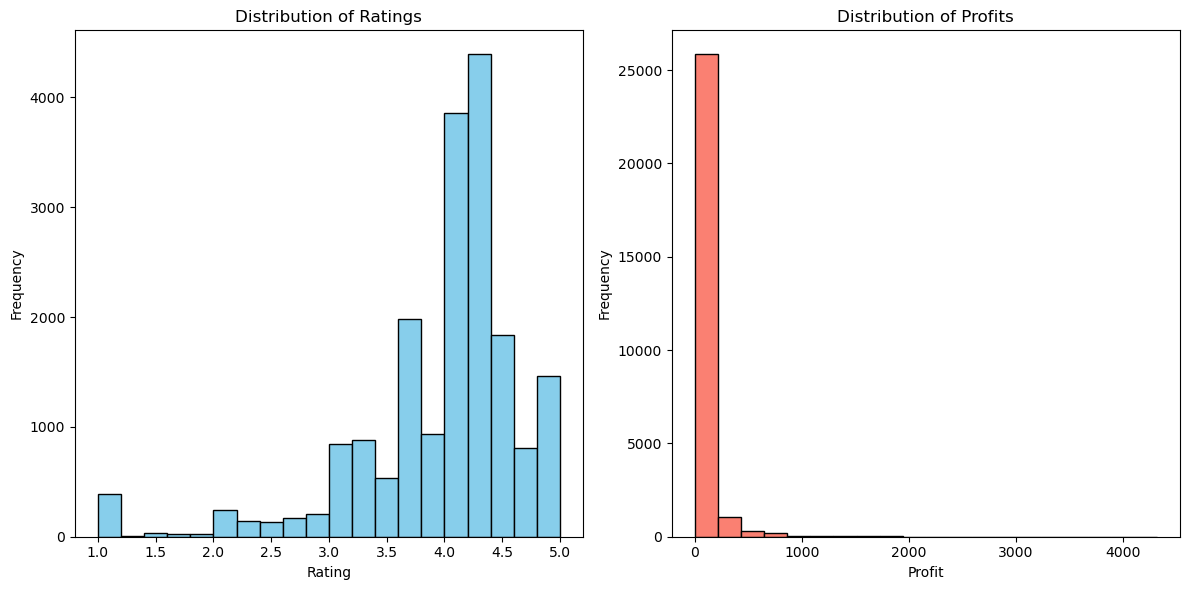

In [42]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of ratings
axs[0].hist(data['rating'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Ratings')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')

# Histogram of profits
axs[1].hist(data['profit'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Profits')
axs[1].set_xlabel('Profit')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

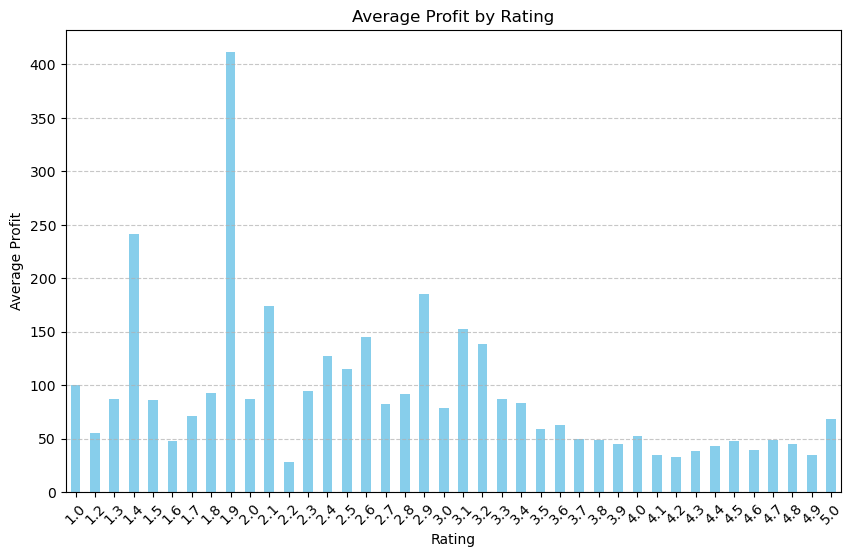

In [44]:


# Group data by rating and calculate average profit
avg_profit_by_rating = data.groupby('rating')['profit'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_profit_by_rating.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


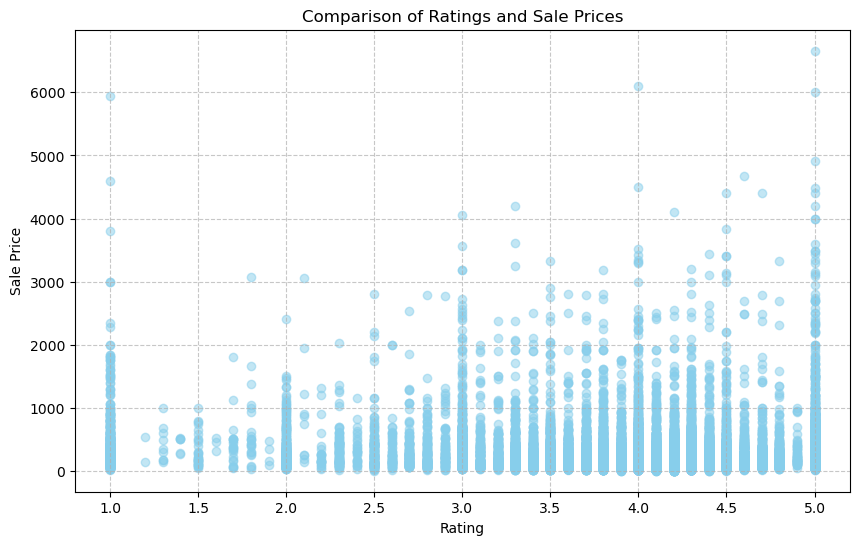

In [45]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['rating'], data['sale_price'], color='skyblue', alpha=0.5)
plt.title('Comparison of Ratings and Sale Prices')
plt.xlabel('Rating')
plt.ylabel('Sale Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

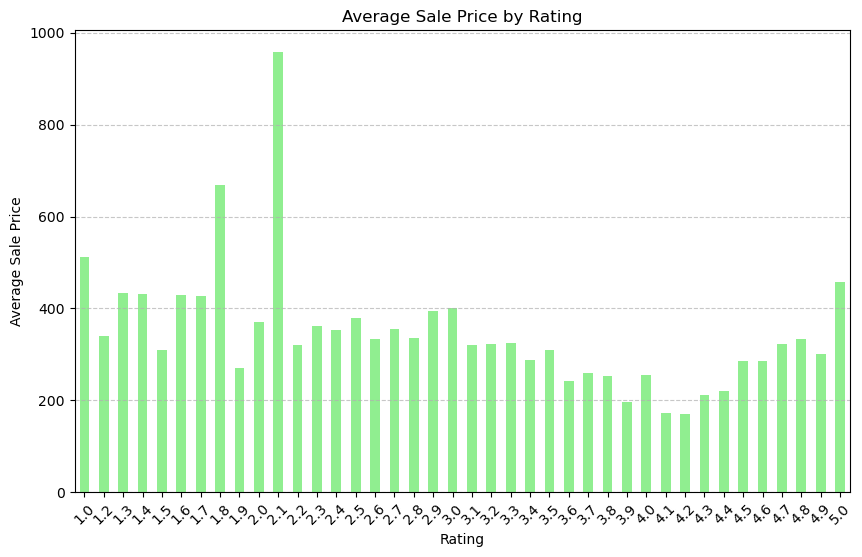

In [46]:

# Group data by rating and calculate average sale price
avg_sale_price_by_rating = data.groupby('rating')['sale_price'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_sale_price_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Sale Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [47]:
# Find the index of the row with the maximum sale price
max_sale_price_index = data['sale_price'].idxmax()

# Get the row with the maximum sale price
item_with_max_sale_price = data.loc[max_sale_price_index]

print("Item with Maximum Sale Price:")
print(item_with_max_sale_price)


Item with Maximum Sale Price:
index                                25302
product                    Bravura Clipper
category            Kitchen, Garden & Pets
sub_category        Pet Food & Accessories
brand                                 Wahl
sale_price                         12500.0
market_price                       12500.0
type               Pet Cleaning & Grooming
rating                                 NaN
loss_percentage                        0.0
profit                                 0.0
Name: 25301, dtype: object


In [48]:
# Check number of null values in the 'rating' column
null_ratings_count = data['rating'].isnull().sum()

print("Number of Null Ratings:", null_ratings_count)


Number of Null Ratings: 8626


In [49]:
# Filter rows with null ratings
null_ratings_data = data[data['rating'].isnull()]

# Save the filtered DataFrame to a new file
null_ratings_data.to_csv('null_ratings_data.csv', index=False)


In [50]:
# Check for null entries in each column
null_entries = data.isnull().sum()

# Print the number of null entries in each column
print(null_entries)


index                 0
product               1
category              0
sub_category          0
brand                 1
sale_price            0
market_price          0
type                  0
rating             8626
loss_percentage       0
profit                0
dtype: int64


In [53]:
# Remove rows with null values
cleaned_data = data.dropna()

# Save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18928 entries, 0 to 27554
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            18928 non-null  int64  
 1   product          18928 non-null  object 
 2   category         18928 non-null  object 
 3   sub_category     18928 non-null  object 
 4   brand            18928 non-null  object 
 5   sale_price       18928 non-null  float64
 6   market_price     18928 non-null  float64
 7   type             18928 non-null  object 
 8   rating           18928 non-null  float64
 9   loss_percentage  18928 non-null  float64
 10  profit           18928 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.7+ MB


In [55]:
# Check for null entries in each column
null_entries = cleaned_data.isnull().sum()

# Print the number of null entries in each column
print(null_entries)


index              0
product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating             0
loss_percentage    0
profit             0
dtype: int64


In [56]:
# Check the number of rows and columns
num_rows, num_columns = cleaned_data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 18928
Number of columns: 11


In [58]:
cleaned_data.head(20)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,loss_percentage,profit
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,0.000000,0.00
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,0.000000,0.00
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,52.400000,131.00
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,15.340909,27.00
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,0.000000,0.00
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,15.075377,30.00
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.00,58.0,Face Care,3.6,0.000000,0.00
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,0.000000,0.00
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5,0.000000,0.00
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.00,20.0,"Utensil Scrub-Pad, Glove",4.3,0.000000,0.00


In [60]:
# Filter the DataFrame for entries with ratings between 1 and 2.5
filtered_rating1_data = cleaned_data[(cleaned_data['rating'] >= 1) & (cleaned_data['rating'] <= 2.5)]

# Save the filtered data to a new file
filtered_rating1_data.to_csv('filtered_data.csv', index=False)
filtered_rating1_data.head(10)


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,loss_percentage,profit
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,0.000000,0.00
11,12,Butter Cookies Gold Collection,Gourmet & World Food,Chocolates & Biscuits,Sapphire,600.00,600.0,"Luxury Chocolates, Gifts",2.2,0.000000,0.00
29,30,Lip Butter - Rose,Beauty & Hygiene,Skin Care,Organic Harvest,169.15,199.0,Lip Care,1.5,15.000000,29.85
64,65,Aqua Halo Rejuvenating Conditioner,Beauty & Hygiene,Hair Care,Azafran,168.75,225.0,Shampoo & Conditioner,1.0,25.000000,56.25
94,95,Stainless Steel Storage Lunch Container - Flat...,"Kitchen, Garden & Pets",Steel Utensils,Ramson,129.00,249.0,Steel Storage Containers,1.5,48.192771,120.00
191,192,Bath & Body Oil - Oriental Spicy Rose,Beauty & Hygiene,Skin Care,Oriental Botanics,699.00,699.0,Aromatherapy,2.0,0.000000,0.00
209,210,OvenOrg Multi Millet Rusk,"Bakery, Cakes & Dairy","Cookies, Rusk & Khari",PRISTINE,35.00,35.0,Rusks,1.8,0.000000,0.00
263,264,Ashwagandha Powder,Gourmet & World Food,Drinks & Beverages,NUTRIWISH,400.00,400.0,Health Drinks,2.5,0.000000,0.00
298,299,Family Sunscreen Lotion SPF 25,Beauty & Hygiene,Skin Care,INATUR,273.00,420.0,Face Care,1.0,35.000000,147.00
299,300,Japanese Cooking Rice-Wine,Gourmet & World Food,Oils & Vinegar,Urban Platter,475.00,500.0,Flavoured & Other Oils,1.0,5.000000,25.00


In [62]:
num_rows, num_columns = filtered_rating1_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1013
Number of columns: 11


In [63]:
# Filter the DataFrame for entries with ratings between 2.5 and 5
filtered_rating2_data = cleaned_data[(cleaned_data['rating'] >= 2.6) & (cleaned_data['rating'] <= 5)]

# Save the filtered data to a new file
filtered_rating2_data.to_csv('filtered_data.csv', index=False)
filtered_rating2_data.head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,loss_percentage,profit
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000,0.0
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000,131.0
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909,27.0
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000,0.0
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,15.075377,30.0
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,0.000000,0.0
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,0.000000,0.0
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,0.000000,0.0
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,0.000000,0.0
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.0,290.0,Flours & Pre-Mixes,4.0,10.000000,29.0


In [64]:
num_rows, num_columns = filtered_rating2_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 17915
Number of columns: 11


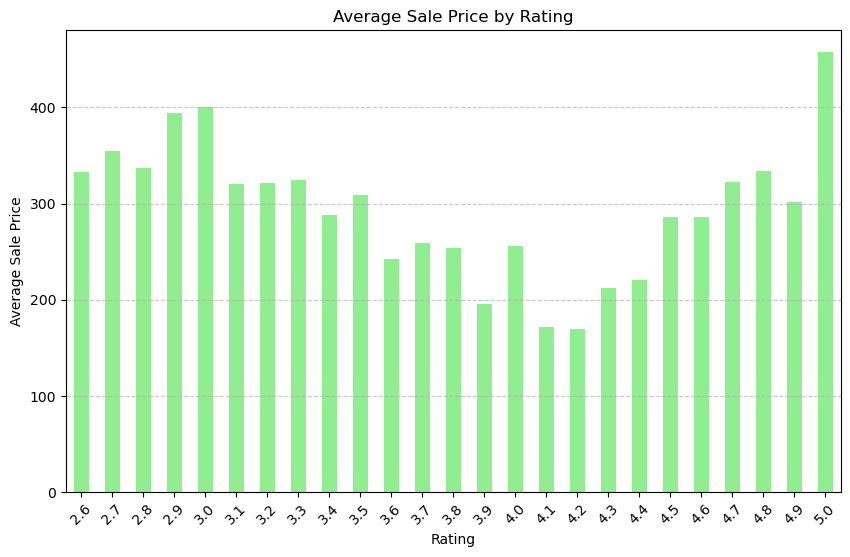

In [65]:

# Group data by rating and calculate average sale price
avg_sale_price_by_rating = filtered_rating2_data.groupby('rating')['sale_price'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_sale_price_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Sale Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


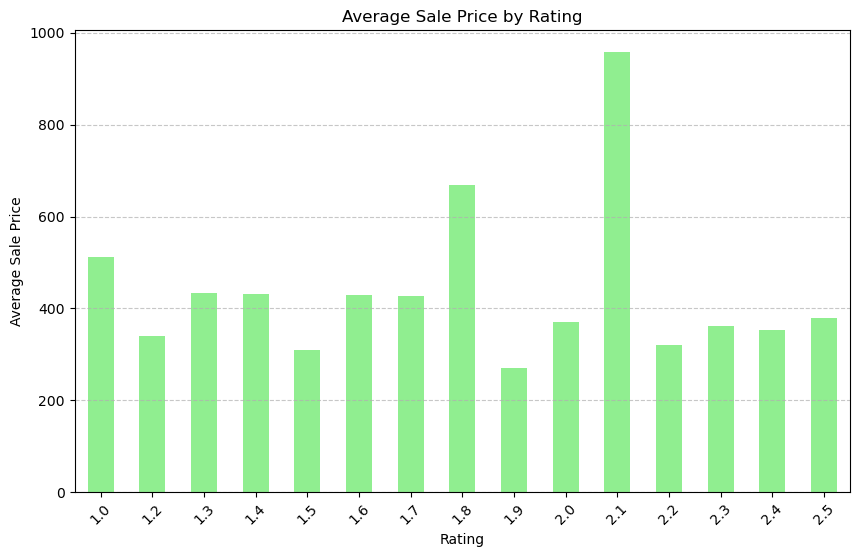

In [66]:

# Group data by rating and calculate average sale price
avg_sale_price_by_rating = filtered_rating1_data.groupby('rating')['sale_price'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_sale_price_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Sale Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [81]:
cleaned_data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,loss_percentage,profit
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000,0.0
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.000000,0.0
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000,131.0
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909,27.0
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000,0.0
